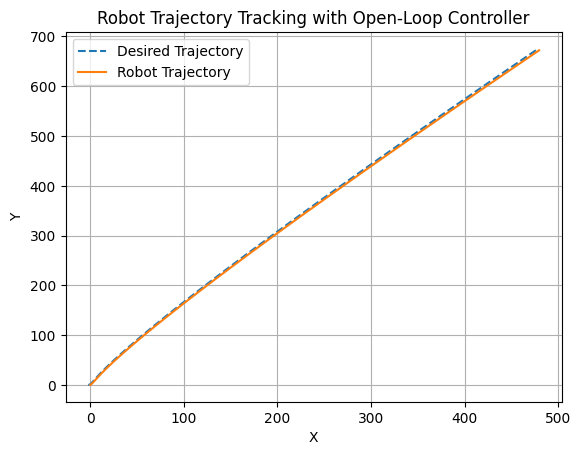

In [1]:
# Question 6a
import numpy as np
import matplotlib.pyplot as plt

# Define basis functions
def phi1(t):
    return t**3

def phi2(t):
    return t**2

def phi3(t):
    return t

def phi4(t):
    return 1

# Define desired trajectory in terms of flat output variable z=(x,y)
def z_desired(t):
    x_desired = (phi1(t) / 6) - (phi2(t) / 2) + (2 * phi3(t)) - (2 * phi4(t))
    y_desired = (phi1(t) / 6) + (phi2(t) / 2)
    return np.column_stack((x_desired, y_desired))

# Compute desired velocities and accelerations
t = np.linspace(0, 15, 1000)
z_des = z_desired(t)
z_dot_des = np.gradient(z_des, t, axis=0)
z_ddot_des = np.gradient(z_dot_des, t, axis=0)

# Compute control inputs using differentially flat equations
a_des = np.linalg.norm(z_ddot_des, axis=1)
omega_des = (z_ddot_des[:, 1] * z_dot_des[:, 0] - z_ddot_des[:, 0] * z_dot_des[:, 1]) / \
            (z_dot_des[:, 0]**2 + z_dot_des[:, 1]**2)

# Integrate control inputs using numerical integration
dt = t[1] - t[0]
v_des = np.cumsum(a_des) * dt
theta_des = np.cumsum(omega_des) * dt

# Initialize robot state
x = np.zeros_like(v_des)
y = np.zeros_like(v_des)
V = np.ones_like(v_des) * 0.5
theta = np.ones_like(v_des) * (-np.pi/2)

# Simulate robot trajectory
for i in range(1, len(v_des)):
    x[i] = x[i-1] + V[i-1] * np.cos(theta[i-1]) * dt
    y[i] = y[i-1] + V[i-1] * np.sin(theta[i-1]) * dt
    V[i] = v_des[i]
    theta[i] = theta_des[i]

# Plot results
plt.figure()
plt.plot(z_des[:, 0], z_des[:, 1], label='Desired Trajectory', linestyle='--')
plt.plot(x, y, label='Robot Trajectory', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Robot Trajectory Tracking with Open-Loop Controller')
plt.legend()
plt.grid(True)
plt.show()
